It took 0.0023849010467529297 seconds to calculate the Mandelbrot graph.


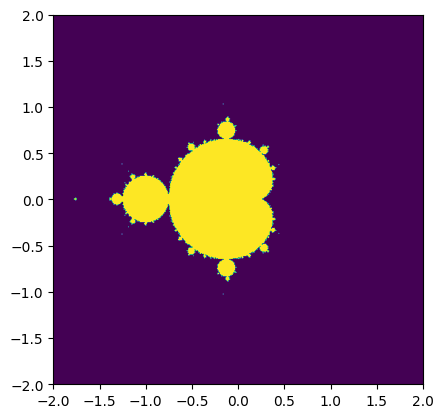

In [1]:
from __future__ import division
from time import time
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pycuda
from pycuda import gpuarray
import pycuda.autoinit


mandel_mod = pycuda.driver.module_from_file('./mandelbrot.ptx')
mandel_ker = mandel_mod.get_function('mandelbrot_ker')

def mandelbrot(breadth, low, high, max_iters, upper_bound):

    lattice = gpuarray.to_gpu(np.linspace(low, high, breadth, dtype=np.float32))
    out_gpu = gpuarray.empty(shape=(lattice.size,lattice.size), dtype=np.float32)
    
    gridsize = int(np.ceil(lattice.size**2 / 32))
    
    
    mandel_ker(lattice, out_gpu, np.int32(256), np.float32(upper_bound**2), np.int32(lattice.size), grid=(gridsize, 1, 1), block=(32,1,1))
    
    out = out_gpu.get()
    
    return out


if __name__ == '__main__':

    t1 = time()
    mandel = mandelbrot(512,-2,2,256, 2)
    t2 = time()

    mandel_time = t2 - t1

    print('It took %s seconds to calculate the Mandelbrot graph.' % mandel_time)
    
    plt.figure(1)
    plt.imshow(mandel, extent=(-2, 2, -2, 2))
    plt.show()
